# Model
## Problem Setting 
The goal is to build a predictive model that can estimate the extent of forest area that will be burned based on various input variables. Given a set of input variables, the task is to predict a continuous numerical value, which represents the burned forest area - regression problem. 

# Training Data
### Input attributes:
- X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
- Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
- FFMC - FFMC index from the FWI system: 18.7 to 96.20
- DMC - DMC index from the FWI system: 1.1 to 291.3 
- DC - DC index from the FWI system: 7.9 to 860.6 
- ISI - ISI index from the FWI system: 0.0 to 56.10
- temp - temperature in Celsius degrees: 2.2 to 33.30
- RH - relative humidity in %: 15.0 to 100
- wind - wind speed in km/h: 0.40 to 9.40 
- rain - outside rain in mm/m2 : 0.0 to 6.4 
- area - the burned area of the forest (in ha): 0.00 to 1090.84season_autumn
- season_summer
- season_spring
- season_winter

### Target variable:

- area - the burned area of the forest (in ha): 0.00 to 1090.84

# Evaluation Protocol
To assess the performance of the various models, standard regression evaluation metrics are employed. The two primary metrics utilized are:
- Mean Squared Error (MSE): Measures the average squared difference between the actual and predicted values. Lower values of MSE indicate better model performance.
- R-squared (R2) Score: quantifies the proportion of the variance in the target variable that is predictable. It ranges from 0 to 1, where higher values signify better predictive ability.
- Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual and predicted values. Lower MAE values indicate better model performance.

# Baseline Model 
The baseline model predicts a constant value (the mean of the target variable) for all instances.

The baseline model evaluation protocol is:
- Baseline Mean Squared Error (MSE): 2.1992238175877623
- Baseline Mean Absolute Error (MAE): 1.2027975534862927
- Baseline R-squared (R2) Score: -0.0006198048100358733

The baseline model has high errors (MSE and MAE) and a very low R-squared score. Indicating poor predictive performance. The horizontal alignment of points in the scatter plot further suggests that the model's predictions are not capturing the underlying relationships in the data. The baseline model's predictions are constant or nearly constant across different input values, leading to poor performance.

The goal is to build models that have lower MSE and MAE values and a higher R-squared score, indicating that they provide better predictions and capture more variance in the data.

# Linear Regression
The Linear Regression Model evaluation protocol is:
- Linear Regression Mean Squared Error (MSE):  2.138832468517143
- Linear Regression Mean Absolute Error (MAE):  1.1672035869757353
- Linear Regression R-squared (R2) Score:  0.026857516704942963

The Linear Regression model is an improvement over the baseline, as evidenced by the lower MSE and MAE values. However, the R-squared score is still relatively low, indicating that there may be complex or non-linear relationships in the data that the linear model is not capturing effectively. 

The straight vertical line at 0 in the scatter plot indicates that the model's predictions are particularly poor when the actual values are near 0 (small fire). The model is struggling to capture the nuances and patterns in the data, especially when the actual values are close to zero.
# Support Vector Regression 
The Support Vector Regression Model evaluation protocol is:
- Mean Squared Error (MSE): 2.4283
- Mean Absolute Error (MAE): 1.0849
- R-squared (R2) Score: -0.1048

The SVR model performs slightly better in terms of MAE compared to the baseline model,indicating that its predictions are, on average, closer to the actual values in terms of absolute errors. The SVR model performs significantly worse in terms of R-squared score, indicating that it is less effective at explaining the variance in the data compared to the baseline model.

This model's predictions are also particularly poor when the actual values are near 0 (small fire).

# Random Forest Regressor 
The Random Forest Regressor Model evaluation protocol is:
- Mean Squared Error (MSE): 2.2505650276855174
- Mean Absolute Error (MAE): 1.2012532072112203
- R-squared (R2) Score: -0.023979424333925525

The Random Forest Regressor model has similar MSE and MAE values to the baseline model, indicating comparable performance in terms of squared and absolute errors. The Random Forest Regressor model has a slightly lower R-squared score, suggesting that it is performing slightly worse in terms of explaining the variance in the data compared to the baseline model.

This model's predictions are also particularly poor when the actual values are near 0 (small fire).

# Results
All three models show some improvements in certain metrics compared to the baseline model, but they also exhibit challenges in capturing the nuances of the data, especially when the actual values are near 0. Based on the provided evaluation metrics, it appears that all three models (Linear Regression, Support Vector Regression, and Random Forest Regressor) have delivered mediocre performance.

# Predicted Data
Found under **'/data'**


In [52]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score


In [53]:
data_log = pd.read_csv("data/data_log.csv") 

In [45]:
X = data_log.drop(['area','fire_type'], axis=1)
y = data_log['area']
X

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,season_autumn,season_spring,season_summer,season_winter
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.000000,False,True,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.000000,True,False,False,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.000000,True,False,False,False
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.182322,False,True,False,False
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.000000,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.000000,False,False,True,False
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.000000,False,False,True,False
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.000000,False,False,True,False
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.000000,False,False,True,False


In [54]:

# Separate numerical features from season columns
numerical_features = X[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
encoded_columns = X[['season_autumn', 'season_spring', 'season_summer', 'season_winter']]

# Standardize the numerical features
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features)

# DataFrame with standardized numerical features and season columns
X_train = pd.DataFrame(
    data=np.hstack((numerical_features_standardized, encoded_columns)),
    columns=numerical_features.columns.append(encoded_columns.columns)
)


In [55]:
X_train

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,season_autumn,season_spring,season_summer,season_winter
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.097261,0.0,1.0,0.0,0.0
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.097261,1.0,0.0,0.0,0.0
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.097261,1.0,0.0,0.0,0.0
3,1.440925,1.383722,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,1.585908,0.0,1.0,0.0,0.0
4,1.440925,1.383722,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.097261,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289524,-1.057862,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.097261,0.0,0.0,1.0,0.0
513,-1.154748,-0.244001,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.097261,0.0,0.0,1.0,0.0
514,1.008313,-0.244001,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.097261,0.0,0.0,1.0,0.0
515,-1.587360,-0.244001,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.097261,0.0,0.0,1.0,0.0


In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)


# Baseline Method

Baseline Mean Squared Error (MSE): 2.1992238175877623
Baseline Mean Absolute Error (MAE): 1.2027975534862927
Baseline R-squared (R2) Score: -0.0006198048100358733


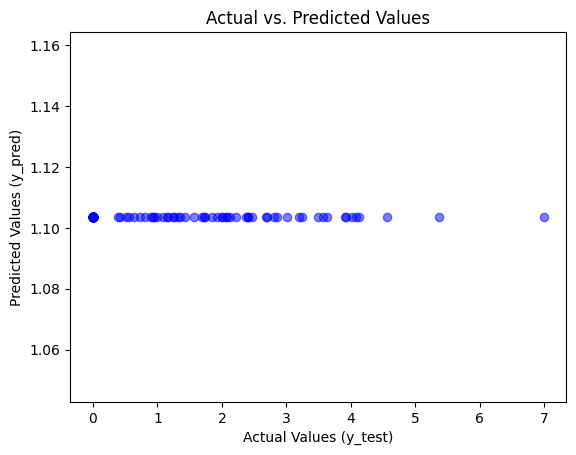

In [57]:
# Calculate the mean of the target variable (burned area)
y_pred_baseline = np.mean(y_train)

# Create an array with the baseline prediction for all test instances
y_pred_baseline = np.full_like(y_test, y_pred_baseline)


# Calculate evaluation metrics
mse_baseline = metrics.mean_squared_error(y_test, y_pred_baseline)
mae_baseline = metrics.mean_absolute_error(y_test, y_pred_baseline)
r2_baseline = metrics.r2_score(y_test, y_pred_baseline)

# Print the evaluation results
print("Baseline Mean Squared Error (MSE):", mse_baseline)
print("Baseline Mean Absolute Error (MAE):", mae_baseline)
print("Baseline R-squared (R2) Score:", r2_baseline)


plt.scatter(y_test, baseline_predictions, alpha=0.5, c='b', label='Actual vs. Predicted (baseline model)')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()


# Linear Regression

mse:  2.138832468517143
mae:  1.1672035869757353
r2:  0.026857516704942963


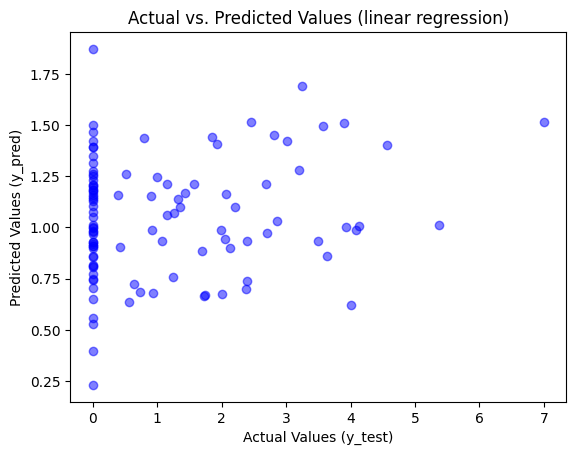

In [28]:
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict
y_pred_linear_regression = reg.predict(X_test)

# Score
mse = metrics.mean_squared_error(y_test, y_pred_linear_regression)
print('mse: ', mse)
mae = metrics.mean_absolute_error(y_test,  y_pred_linear_regression)
print('mae: ', mae)
r2 = metrics.r2_score(y_test, y_pred_linear_regression)
print('r2: ',r2)

plt.scatter(y_test, y_pred_linear_regression, alpha=0.5, c='b', label='Actual vs. Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values (linear regression)')
plt.show()

In [27]:

# Create a DataFrame with the predicted values
predicted_df = pd.DataFrame({'Predicted_Values': y_pred_linear_regression})

# Save the DataFrame to a CSV file
predicted_df.to_csv('predicted_values_linear_regression.csv', index=False)


# Suport Vector Regression

Mean Squared Error (MSE): 2.4283
Mean Absolute Error (MAE): 1.0849
R-squared (R2) Score: -0.1048


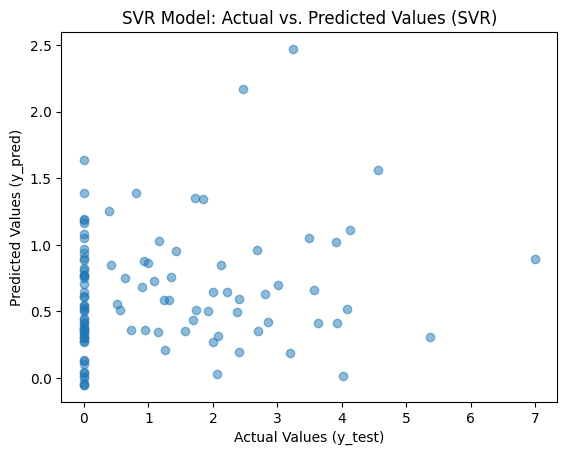

In [32]:


# Create an SVR model with specified parameters
reg = SVR(C=1, kernel='rbf', gamma='auto', max_iter=10000, cache_size=1000)

# Fit the SVR model to the training data
reg.fit(X_train, y_train)

# Predict target values on the test data
y_pred_svr = reg.predict(X_test)

# Calculate evaluation metrics: MSE, MAE, R2
mse = metrics.mean_squared_error(y_test, y_pred_svr)
mae = metrics.mean_absolute_error(y_test, y_pred_svr)
r2 = metrics.r2_score(y_test, y_pred_svr)

print('Mean Squared Error (MSE):', np.round(mse, 4))
print('Mean Absolute Error (MAE):', np.round(mae, 4))
print('R-squared (R2) Score:', np.round(r2, 4))

# Plot the relationship between actual and predicted values
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('SVR Model: Actual vs. Predicted Values (SVR)')
plt.show()


# Random Forest Regressor

Mean Squared Error (MSE): 2.2505650276855174
Mean Absolute Error (MAE): 1.2012532072112203
R-squared (R2) Score: -0.023979424333925525


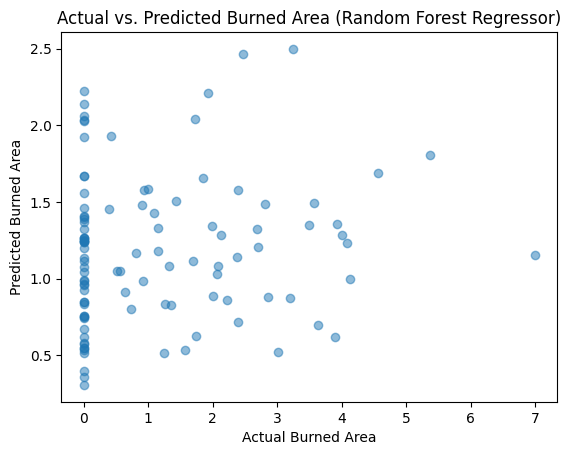

In [41]:
# Create and train the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the testing data
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_random_forest)
mae = mean_absolute_error(y_test, y_pred_random_forest)
r2 = r2_score(y_test, y_pred_random_forest)

# Print evaluation results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred_random_forest, alpha=0.5)
plt.xlabel('Actual Burned Area')
plt.ylabel('Predicted Burned Area')
plt.title('Actual vs. Predicted Burned Area (Random Forest Regressor)')
plt.show()

In [43]:
# Create a DataFrame for each model's predicted values
df_linear_regression = pd.DataFrame({'Actual': y_test, 'Predicted (Linear Regression)': y_pred_linear_regression})
df_svr = pd.DataFrame({'Actual': y_test, 'Predicted (SVR)': y_pred_svr})
df_random_forest = pd.DataFrame({'Actual': y_test, 'Predicted (Random Forest)': y_pred_random_forest})

# Export the DataFrames to CSV files
df_linear_regression.to_csv('data/linear_regression_predictions.csv', index=False)
df_svr.to_csv('data/svr_predictions.csv', index=False)
df_random_forest.to_csv('data/random_forest_predictions.csv', index=False)
